Programowanie w Analityce Danych
Praca domowa 5
Dane: Trumptweets_data.csv
Zadanie 1
Dokonaj klasteryzacji danych z pliku z użyciem KMeans i DBSCAN:
a)	Wyłącz ze zbioru kolumny A i B
b)	Znajdź optymalną liczbę K dla algorytmu K Means.
c)	Oblicz średnie zmiennych dla każdego klastra wg DBSCAN i KMeans



In [9]:
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_moons
from sklearn import preprocessing
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from yellowbrick.cluster import distortion_score
from collections import Counter

df = pd.read_csv("trumptweets_data.csv",delimiter = ";", decimal=',')
df.drop(['A','B'], axis = 'columns', inplace = True)
df.shape

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.353846,0.992222,0.674848,0.554444,0.945556,0.353846,0.1304,0.7391,0.456539,0.072500,...,0.000000,0.0000,0.0,0.0000,0.01740,0.000000,0.0000,0.0000,0.0,0.000000
1,0.338462,0.975152,0.826667,0.322626,0.957071,0.338462,0.3182,0.9091,0.477307,0.075833,...,0.000000,0.0000,0.0,0.0000,0.01820,0.000000,0.0000,0.0000,0.0,0.000000
2,0.307692,0.977677,0.505051,0.160202,0.977374,0.307692,0.1500,0.5000,0.175009,0.000000,...,0.000000,0.0500,0.0,0.0000,0.02000,0.074996,0.0000,0.0000,0.0,0.066667
3,0.261538,0.981919,0.505051,1.000000,0.260303,0.261538,0.2941,0.7647,0.205927,0.000000,...,0.000000,0.1176,0.0,0.0000,0.00000,0.000000,0.0000,0.0000,0.0,0.078400
4,0.307692,0.261515,0.023333,0.755152,0.260303,0.153846,0.1000,0.6500,0.700035,0.333333,...,0.000000,0.0000,0.0,0.0000,0.00000,0.224989,0.1000,0.1000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41116,0.292308,0.066263,0.707879,0.508586,1.000000,0.146154,0.1053,0.8947,0.736904,0.263167,...,0.000000,0.0000,0.0,0.0000,0.02104,0.000000,0.0000,0.0000,0.0,0.000000
41117,0.815385,0.761919,0.835657,0.013232,0.010101,0.203846,0.2075,0.7547,0.638432,0.188667,...,0.163597,0.0000,0.0,0.0000,0.00756,0.000000,0.0000,0.0000,0.0,0.000000
41118,0.723077,0.892323,0.505051,0.085960,1.000000,0.361538,0.2553,0.6170,0.397153,0.035500,...,0.184399,0.0000,0.0,0.0213,0.00852,0.031948,0.0000,0.0426,0.0,0.070933
41119,0.430769,0.969697,0.363939,0.043939,0.010101,0.107692,0.2857,0.6429,0.416637,0.059500,...,0.077356,0.0000,0.0,0.0357,0.01428,0.053547,0.1429,0.0000,0.0,0.071400


b)

In [11]:
distortion_scores = []
for k in range(4, 13):
    model = KMeans(n_clusters=k)
    model.fit_transform(df)
    distortion_scores.append(distortion_score(df, model.labels_))
kl = KneeLocator(x=range(4, 13),
                 y=distortion_scores,
                  curve='convex',
                  direction='decreasing',
                  S=1
                  )
found_knee = kl.knee
print(found_knee)

7


c)

In [12]:
km = KMeans(n_clusters=7)
km.fit(df)
pd.DataFrame(km.cluster_centers_,columns = df.keys())

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.337738,0.751675,0.484011,0.785009,0.179472,0.190845,0.227813,0.753925,0.490928,1.417001e-01,...,6.698170e-02,0.016488,0.0,0.006140,0.012965,3.391706e-02,0.036290,4.162564e-02,0.010491,0.057606
1,0.350993,0.769637,0.530029,0.754951,0.965755,0.181023,0.229280,0.784377,0.480231,1.453238e-01,...,6.607335e-02,0.017499,0.0,0.002480,0.017894,2.968039e-02,0.037495,3.089616e-02,0.008934,0.054699
2,0.015490,0.941804,0.505051,0.010101,0.260303,0.015444,0.002079,0.000245,0.000143,4.996004e-16,...,2.706169e-16,0.000408,0.0,0.999062,0.000049,-6.938894e-18,0.000815,6.938894e-17,0.000000,0.665933
3,0.313802,0.315020,0.765851,0.160742,0.979353,0.161659,0.226124,0.787873,0.547603,2.767775e-01,...,6.652930e-02,0.026604,0.0,0.005789,0.020959,2.724217e-02,0.061743,4.891931e-02,0.006613,0.076116
4,0.292228,0.922672,0.687334,0.098036,0.189488,0.205437,0.313397,0.546849,0.276166,6.385866e-02,...,4.383630e-02,0.028317,0.0,0.004481,0.012112,5.971994e-02,0.055863,3.029015e-02,0.009531,0.147018
5,0.378457,0.472067,0.697970,0.136952,0.145128,0.195406,0.218477,0.779991,0.567092,2.277334e-01,...,6.860677e-02,0.016483,0.0,0.009975,0.012035,2.461776e-02,0.041967,4.822268e-02,0.011872,0.049127
6,0.309448,0.887345,0.753533,0.091172,0.977360,0.177906,0.284686,0.648468,0.340191,1.073418e-01,...,5.516818e-02,0.023586,0.0,0.002768,0.023729,3.793133e-02,0.050089,2.093254e-02,0.006146,0.122279


In [16]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 203
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(df)
distances, indices = nbrs.kneighbors(df)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc)

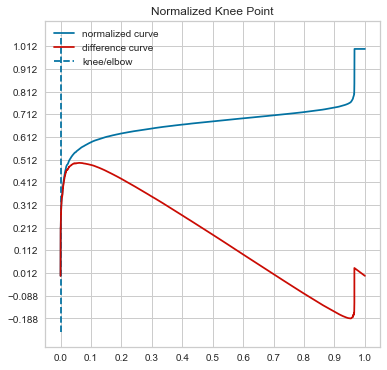

In [17]:
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure
kneedle.plot_knee_normalized()

In [18]:
epsilon = kneedle.knee_y
print(epsilon)

1.835726698561544


In [19]:
db = DBSCAN(eps=1) #mialem za malo ramu w komputerze, zeby przeprowadzic dla eps = 1.83...
db.fit(df)

DBSCAN(eps=1)

In [20]:
df[('DBSCAN_LABELS')]=db.labels_
df.DBSCAN_LABELS.unique()
df.groupby('DBSCAN_LABELS').mean()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
DBSCAN_LABELS,,,,,,,,,,,,,,,,,,,,,
-1,0.086849,0.486610,0.546403,0.413273,0.488080,0.071184,0.342455,0.769085,0.339543,0.173867,...,0.102991,0.017338,0.0,0.024320,0.061757,0.079023,0.063459,0.099020,0.021664,0.141974
0,0.330489,0.709727,0.668224,0.291381,0.581812,0.186761,0.254193,0.704529,0.437187,0.153603,...,0.059861,0.021857,0.0,0.005093,0.016554,0.036064,0.047643,0.034924,0.008701,0.089362
1,0.015385,0.942020,0.505051,0.010101,0.260303,0.015385,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
2,0.030769,0.942020,0.505051,1.000000,0.260303,0.030769,0.500000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.055556
3,0.030769,0.942020,1.000000,0.010101,0.010101,0.030769,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.030769,0.942020,0.505051,0.010101,0.010101,0.030769,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
